# **Personal Identity**

Nama  : [Antonius Wisnumurti Sulistyanto](https://www.linkedin.com/in/antonius-wisnumurti-sulistyanto/)

Kelas : DS Batch 33 A

# Understand Data

This data orign from [Kaggle](https://www.kaggle.com/datasets/arashnic/taxi-pricing-with-mobility-analytics) Data provided by an Indian cab aggregator service Sigma Cabs. Their customers can download their app on smartphones and book a cab from any where in the cities they operate in. They, in turn search for cabs from various service providers and provide the best option to their client across available options. They have been in operation for little less than a year now. During this period, they have captured surge_pricing_type from the service providers.

The main objective is to build a predictive model, which could help them in predicting the surge_pricing_type pro-actively. This would in turn help them in matching the right cabs with the right customers quickly and efficiently

## Data Dictionary
- Trip_ID: ID for TRIP
-Trip_Distance: The distance for the trip requested by the customer
- Type_of_Cab: Category of the cab requested by the customer
- Customer_Since_Months: Customer using cab services since n months; 0 month means current month
- Life_Style_Index: Proprietary index created by Sigma Cabs showing lifestyle of the customer based on their behaviour
- Confidence_Life_Style_Index: Category showing confidence on the index mentioned above
- Destination_Type: Sigma Cabs divides any destination in one of the 14 categories.
- Customer_Rating: Average of life time ratings of the customer till date
- Cancellation_Last_1Month: Number of trips cancelled by the customer in last 1 month
- Var1, Var2 and Var3: Continuous variables masked by the company. Can be used for modelling purposes
- Gender: Gender of the customer
- Surge_Pricing_Type: Target (can be of 3 types)

# Bussines Understanding
Taxi company from India have been in operation for little less than a year now. During this period, they have captured surge_pricing_type, and now want to predictive their customer surge pricing type to understsand what kind of features dirves surge pricing type and Provide actionable insights to help the business allocate vehicles efficiently and optimise pricing strategy

# Questions


1. How much persentation for each type of Surge Pricing?
2. Identifying what kind of features that affected Classification
3. Based on features that affected churn, what kind of reccomendation will you give?

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)

I have put my dataset in a google drive folder and I need to mount the google drive to access it.

In [2]:
#set up connection to google drive
from google.colab import drive
drive.mount('/content/drive/')

data_path = '/content/drive/My Drive/Case study/Take Home Test DS - Antonius Wisnumurti Sulistyanto/'

Mounted at /content/drive/


# Read Data

## 1. Read data set from csv file

In [3]:
#load data
data_1 = pd.read_csv(data_path + 'sigma_cabs.csv')
data_1.sample(5)

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
23146,T0005727817,44.58,NaN,10.0,NaN,NaN,B,1.60625,3,106.0,56,94,Female,3
61222,T0005791343,77.35,NaN,10.0,3.12216,C,A,3.63250,1,56.0,53,85,Female,2
100401,T0005856674,80.41,B,10.0,2.71054,C,A,2.23375,0,NaN,56,78,Female,2
68777,T0005803879,29.99,A,3.0,2.81774,A,B,4.29375,0,109.0,53,67,Female,1
57996,T0005786054,14.82,D,NaN,2.82124,B,A,2.43750,1,NaN,54,82,Male,2


## 2. Check data types for every columns

In [4]:
#info data
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131662 entries, 0 to 131661
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Trip_ID                      131662 non-null  object 
 1   Trip_Distance                131662 non-null  float64
 2   Type_of_Cab                  111452 non-null  object 
 3   Customer_Since_Months        125742 non-null  float64
 4   Life_Style_Index             111469 non-null  float64
 5   Confidence_Life_Style_Index  111469 non-null  object 
 6   Destination_Type             131662 non-null  object 
 7   Customer_Rating              131662 non-null  float64
 8   Cancellation_Last_1Month     131662 non-null  int64  
 9   Var1                         60632 non-null   float64
 10  Var2                         131662 non-null  int64  
 11  Var3                         131662 non-null  int64  
 12  Gender                       131662 non-null  object 
 13 

- Total Column are 14 with rows 131662
- All columns have correct data type

## 3. Check duplicated value in every column

In [5]:
#check duplicate values
print('Duplicate values is ', data_1.duplicated().sum())

Duplicate values is  0


In [6]:
#shows all duplicate values
data_1[data_1.duplicated(keep = False)]

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type


- There are no duplicated values

## 4. Check miss value in every columns

In [7]:
#check miss value
miss_value = data_1.isnull().sum().reset_index().rename(columns = {'index':'column', 0:'miss_value'})
miss_value

,column,miss_value
0,Trip_ID,0
1,Trip_Distance,0
2,Type_of_Cab,20210
3,Customer_Since_Months,5920
4,Life_Style_Index,20193
5,Confidence_Life_Style_Index,20193
6,Destination_Type,0
7,Customer_Rating,0
8,Cancellation_Last_1Month,0
9,Var1,71030


- There are lot of missing values in every columns but range of miss valuse only from 5000 until less than 72000
- If I have 130K+ rows, percentage of miss valeus in every columns are around 5-50%
- But I will check percentage from every columns later at Data Cleaning section

## 5. Check values doesn't match with column name

In [8]:
#check values doesn't match with column
list_column = data_1.columns
for x in list_column:
  print(f'-------------------------------{x}-------------------------------')
  jumlah_value = data_1[x].value_counts().sort_index().reset_index()
  display(jumlah_value)

-------------------------------Trip_ID-------------------------------


,Trip_ID,count
0,T0005689460,1
1,T0005689461,1
2,T0005689464,1
3,T0005689465,1
4,T0005689467,1
...,...,...
131657,T0005908509,1
131658,T0005908510,1
131659,T0005908512,1
131660,T0005908513,1


-------------------------------Trip_Distance-------------------------------


,Trip_Distance,count
0,0.31,1
1,1.53,1
2,1.54,1
3,1.55,2
4,1.56,2
...,...,...
10321,109.19,17
10322,109.20,13
10323,109.21,12
10324,109.22,12


-------------------------------Type_of_Cab-------------------------------


,Type_of_Cab,count
0,A,21569
1,B,31136
2,C,28122
3,D,18991
4,E,11634


-------------------------------Customer_Since_Months-------------------------------


,Customer_Since_Months,count
0,0.0,10169
1,1.0,8297
2,2.0,11621
3,3.0,10351
4,4.0,7726
5,5.0,8641
6,6.0,7375
7,7.0,7407
8,8.0,6328
9,9.0,5147


-------------------------------Life_Style_Index-------------------------------


,Life_Style_Index,count
0,1.59638,1
1,1.65696,1
2,1.67906,1
3,1.68789,1
4,1.73656,1
...,...,...
55973,4.59115,1
55974,4.65904,1
55975,4.69012,1
55976,4.85378,1


-------------------------------Confidence_Life_Style_Index-------------------------------


,Confidence_Life_Style_Index,count
0,A,35147
1,B,40355
2,C,35967


-------------------------------Destination_Type-------------------------------


,Destination_Type,count
0,A,77597
1,B,29555
2,C,7484
3,D,6588
4,E,2717
5,F,1950
6,G,1489
7,H,1260
8,I,813
9,J,695


-------------------------------Customer_Rating-------------------------------


,Customer_Rating,count
0,0.00125,2
1,0.00250,1
2,0.00375,3
3,0.00625,1
4,0.00875,1
...,...,...
3926,4.99500,1
3927,4.99625,1
3928,4.99750,4
3929,4.99875,1


-------------------------------Cancellation_Last_1Month-------------------------------


,Cancellation_Last_1Month,count
0,0,68687
1,1,36834
2,2,16223
3,3,7142
4,4,1823
5,5,668
6,6,266
7,7,16
8,8,3


-------------------------------Var1-------------------------------


,Var1,count
0,30.0,269
1,31.0,411
2,32.0,523
3,33.0,590
4,34.0,761
...,...,...
117,171.0,1
118,173.0,1
119,179.0,1
120,200.0,1


-------------------------------Var2-------------------------------


,Var2,count
0,40,3
1,41,25
2,42,486
3,43,1461
4,44,3604
5,45,6023
6,46,8715
7,47,10479
8,48,11878
9,49,12445


-------------------------------Var3-------------------------------


,Var3,count
0,52,11
1,53,94
2,54,392
3,55,645
4,56,1030
...,...,...
91,147,1
92,155,3
93,166,1
94,174,1


-------------------------------Gender-------------------------------


,Gender,count
0,Female,37762
1,Male,93900


-------------------------------Surge_Pricing_Type-------------------------------


,Surge_Pricing_Type,count
0,1,27214
1,2,56728
2,3,47720


- There's no values that don't match with column

## 6. Descriptive Statistic

In [9]:
#descriptive statistic for numerical type
descriptive_numerical = data_1.describe()
descriptive_numerical

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type
count,131662.000000,125742.000000,111469.000000,131662.000000,131662.000000,60632.000000,131662.000000,131662.000000,131662.000000
mean,44.200909,6.016661,2.802064,2.849458,0.782838,64.202698,51.202800,75.099019,2.155747
std,25.522882,3.626887,0.225796,0.980675,1.037559,21.820447,4.986142,11.578278,0.738164
min,0.310000,0.000000,1.596380,0.001250,0.000000,30.000000,40.000000,52.000000,1.000000
25%,24.580000,3.000000,2.654730,2.152500,0.000000,46.000000,48.000000,67.000000,2.000000
50%,38.200000,6.000000,2.798050,2.895000,0.000000,61.000000,50.000000,74.000000,2.000000
75%,60.730000,10.000000,2.946780,3.582500,1.000000,80.000000,54.000000,82.000000,3.000000
max,109.230000,10.000000,4.875110,5.000000,8.000000,210.000000,124.000000,206.000000,3.000000


- Transcation_ID, Customer_ID, Phone, and Zipcode have numerical data type but it only use as identity
- Age, Total_Purchases, Amount, and Ratings have symetrical distribution, becasue mean and median value is not have huge gap
- Ratings and Year have discrete, have certain limit values which mean can't be calculated

In [10]:
#descriptive statistic for categorical type
descriptive_categorical = data_1.describe(include='object').T
descriptive_categorical

,count,unique,top,freq
Trip_ID,131662,131662,T0005908514,1
Type_of_Cab,111452,5,B,31136
Confidence_Life_Style_Index,111469,3,B,40355
Destination_Type,131662,14,A,77597
Gender,131662,2,Male,93900


- Type of cab B have the most use by customers
- Gender Male as our majority of our customers
- Destination type A became as type that our customers take

# Data Cleaning

## 1. Handle Missing Values

In [11]:
#shows percentage of missing values in every columns
total_rows = len(data_1)

for column in data_1.columns:
    missing_count = data_1[column].isna().sum()
    missing_percentage = (missing_count / total_rows) * 100
    print(f"Column: '{column}', miss values: {missing_count}, total percentage: ({missing_percentage:.2f}%)")

Column: 'Trip_ID', miss values: 0, total percentage: (0.00%)
Column: 'Trip_Distance', miss values: 0, total percentage: (0.00%)
Column: 'Type_of_Cab', miss values: 20210, total percentage: (15.35%)
Column: 'Customer_Since_Months', miss values: 5920, total percentage: (4.50%)
Column: 'Life_Style_Index', miss values: 20193, total percentage: (15.34%)
Column: 'Confidence_Life_Style_Index', miss values: 20193, total percentage: (15.34%)
Column: 'Destination_Type', miss values: 0, total percentage: (0.00%)
Column: 'Customer_Rating', miss values: 0, total percentage: (0.00%)
Column: 'Cancellation_Last_1Month', miss values: 0, total percentage: (0.00%)
Column: 'Var1', miss values: 71030, total percentage: (53.95%)
Column: 'Var2', miss values: 0, total percentage: (0.00%)
Column: 'Var3', miss values: 0, total percentage: (0.00%)
Column: 'Gender', miss values: 0, total percentage: (0.00%)
Column: 'Surge_Pricing_Type', miss values: 0, total percentage: (0.00%)


- Every columns have missing values, range 5000 - 71000. It's have range from 10% - 50%
- For 'Type_of_Cab', I will repalce it with mode, because when order our service customers should put type of cab that they want to use, if not it will be set to the cheapest type
- 'Customer_Since_Months' for this feature i won't replace miss values with median, because there are customers that not resgistered that still use our service
- 'Life_Style_Index' for this feature We will replace it with median based on type of cab
- 'Confidence_Life_Style_Index' also same like Life_Style_Index
- 'Var1' will replace miss values in it with median

###Type of Cab

In [12]:
#fill NaN values in type of cab with mode
mode_typecab = (data_1['Type_of_Cab']).mode().iloc[0]
data_1['Type_of_Cab'] = data_1['Type_of_Cab'].fillna(mode_typecab)

###Customer Since Month

In [13]:
#crafted new column for missing values in customer since month
#data_1["csm_is_missing"] = data_1["Customer_Since_Months"].isna().astype(int)
data_1["Customer_Since_Months"] = data_1["Customer_Since_Months"].fillna(-1)

###LIfe Style Index

In [14]:
#replace miss value in life style index
median_life = data_1.groupby('Type_of_Cab')['Life_Style_Index'].median()
data_1['Life_Style_Index'] = data_1['Life_Style_Index'].fillna(
    data_1['Type_of_Cab'].map(median_life)
)

#if miss values still exist replace with global median
data_1["Life_Style_Index"] = data_1["Life_Style_Index"].fillna(
    data_1["Life_Style_Index"].median()
)

###Confidence Life Style Index

In [15]:
#fill miss values in confidence life style index
conf_by_cab = (
    data_1.groupby("Type_of_Cab")["Confidence_Life_Style_Index"]
    .agg(lambda s: s.mode(dropna=True).iloc[0] if not s.mode(dropna=True).empty else np.nan)
)

# Fill NaN using the cab-specific mode
data_1["Confidence_Life_Style_Index"] = data_1["Confidence_Life_Style_Index"].fillna(
    data_1["Type_of_Cab"].map(conf_by_cab)
)

#if miss values still exist replace with global median
data_1["Confidence_Life_Style_Index"] = data_1["Confidence_Life_Style_Index"].fillna(
    data_1["Confidence_Life_Style_Index"].mode()
)

###Var1

In [16]:
#fill na in Var1 with median
median_var1 = data_1['Var1'].median()
data_1['Var1'] = data_1['Var1'].fillna(median_var1)

In [17]:
#recheck miss values
total_rows = len(data_1)

for column in data_1.columns:
    missing_count = data_1[column].isna().sum()
    missing_percentage = (missing_count / total_rows) * 100
    print(f"Column: '{column}', miss values: {missing_count}, total percentage: ({missing_percentage:.2f}%)")

Column: 'Trip_ID', miss values: 0, total percentage: (0.00%)
Column: 'Trip_Distance', miss values: 0, total percentage: (0.00%)
Column: 'Type_of_Cab', miss values: 0, total percentage: (0.00%)
Column: 'Customer_Since_Months', miss values: 0, total percentage: (0.00%)
Column: 'Life_Style_Index', miss values: 0, total percentage: (0.00%)
Column: 'Confidence_Life_Style_Index', miss values: 0, total percentage: (0.00%)
Column: 'Destination_Type', miss values: 0, total percentage: (0.00%)
Column: 'Customer_Rating', miss values: 0, total percentage: (0.00%)
Column: 'Cancellation_Last_1Month', miss values: 0, total percentage: (0.00%)
Column: 'Var1', miss values: 0, total percentage: (0.00%)
Column: 'Var2', miss values: 0, total percentage: (0.00%)
Column: 'Var3', miss values: 0, total percentage: (0.00%)
Column: 'Gender', miss values: 0, total percentage: (0.00%)
Column: 'Surge_Pricing_Type', miss values: 0, total percentage: (0.00%)


- All missing values already replace, so We can jump into next procces

#Train, and Test split data

In [18]:
#split the data
from sklearn.model_selection import train_test_split

X = data_1.drop(columns='Surge_Pricing_Type')
y = data_1[['Surge_Pricing_Type']]

#splitting: train and test
X_data_train, X_data_test, y_data_train, y_data_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [19]:
X_data_train = X_data_train.drop(columns='Trip_ID')
X_data_test = X_data_test.drop(columns='Trip_ID')

In [20]:
X_data_train.sample(3)

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender
2564,25.43,B,6.0,2.75588,A,A,3.4425,3,45.0,52,74,Male
44435,57.82,A,3.0,2.88072,C,A,3.2575,1,61.0,51,74,Male
118018,75.37,D,9.0,2.84623,C,A,2.1750,0,50.0,46,76,Female


#Encoding

##OHe

###Gender

In [21]:
#ohe for gender
from sklearn.preprocessing import OneHotEncoder
ohe_features = ['Gender']

X_data_train = pd.get_dummies(X_data_train, columns=ohe_features, drop_first=True)
X_data_test = pd.get_dummies(X_data_test, columns=ohe_features, drop_first=True)

In [22]:
#alter data type
X_data_train['Gender_Male'] = X_data_train['Gender_Male'].astype(int)
X_data_test['Gender_Male'] = X_data_test['Gender_Male'].astype(int)

We already altered Gender become new feature GenderMale with values binary

- 0 -> female

- 1 -> male

###Type of Cab

In [23]:
#ohe for payment method
ohe_churn = ['Type_of_Cab']

X_data_train = pd.get_dummies(X_data_train, columns=ohe_churn)
X_data_test = pd.get_dummies(X_data_test, columns=ohe_churn)

In [24]:
#alter data type
list_payment = ['Type_of_Cab_A', 'Type_of_Cab_B', 'Type_of_Cab_C', 'Type_of_Cab_D', 'Type_of_Cab_E']
for x in list_payment:
  X_data_train[x] = X_data_train[x].astype(int)
  X_data_test[x] = X_data_test[x].astype(int)

We have been conducted OHe for Type of Cab , and now there are 5 separeted columns fe each method:
- Type_of_Cab_A
- Type_of_Cab_B
- Type_of_Cab_C
- Type_of_Cab_D
- Type_of_Cab_E

###2 Features

In [25]:
ohe_cols = ['Confidence_Life_Style_Index', 'Destination_Type']

#train set
X_data_train = pd.get_dummies(X_data_train, columns=ohe_cols, dtype='uint8')
X_data_test = pd.get_dummies(X_data_test, columns=ohe_cols, dtype='uint8')

We have been used OHe for 2 features:
- Confidence_Life_Style_Index
- Destination_Type

Next We will drope uselsess features

In [26]:
#recheck values doesn't match with column
list_column = X_data_train.columns
for x in list_column:
  print(f'-------------------------------{x}-------------------------------')
  jumlah_value = X_data_train[x].value_counts().sort_index().reset_index()
  display(jumlah_value)

-------------------------------Trip_Distance-------------------------------


,Trip_Distance,count
0,0.31,1
1,1.53,1
2,1.55,1
3,1.56,2
4,1.59,1
...,...,...
10132,109.19,13
10133,109.20,7
10134,109.21,9
10135,109.22,10


-------------------------------Customer_Since_Months-------------------------------


,Customer_Since_Months,count
0,-1.0,4756
1,0.0,8145
2,1.0,6613
3,2.0,9299
4,3.0,8256
5,4.0,6160
6,5.0,6917
7,6.0,5853
8,7.0,5944
9,8.0,5063


-------------------------------Life_Style_Index-------------------------------


,Life_Style_Index,count
0,1.59638,1
1,1.65696,1
2,1.67906,1
3,1.68789,1
4,1.73656,1
...,...,...
49764,4.59115,1
49765,4.65904,1
49766,4.69012,1
49767,4.85378,1


-------------------------------Customer_Rating-------------------------------


,Customer_Rating,count
0,0.00125,2
1,0.00250,1
2,0.00375,3
3,0.00625,1
4,0.00875,1
...,...,...
3891,4.99375,1
3892,4.99500,1
3893,4.99750,3
3894,4.99875,1


-------------------------------Cancellation_Last_1Month-------------------------------


,Cancellation_Last_1Month,count
0,0,54991
1,1,29408
2,2,12993
3,3,5695
4,4,1474
5,5,544
6,6,209
7,7,13
8,8,2


-------------------------------Var1-------------------------------


,Var1,count
0,30.0,222
1,31.0,333
2,32.0,430
3,33.0,470
4,34.0,631
...,...,...
110,161.0,1
111,163.0,1
112,165.0,2
113,169.0,1


-------------------------------Var2-------------------------------


,Var2,count
0,40,3
1,41,23
2,42,398
3,43,1159
4,44,2878
5,45,4868
6,46,6985
7,47,8378
8,48,9551
9,49,9924


-------------------------------Var3-------------------------------


,Var3,count
0,52,10
1,53,70
2,54,316
3,55,530
4,56,805
...,...,...
90,142,1
91,147,1
92,155,2
93,166,1


-------------------------------Gender_Male-------------------------------


,Gender_Male,count
0,0,30123
1,1,75206


-------------------------------Type_of_Cab_A-------------------------------


,Type_of_Cab_A,count
0,0,88046
1,1,17283


-------------------------------Type_of_Cab_B-------------------------------


,Type_of_Cab_B,count
0,0,64200
1,1,41129


-------------------------------Type_of_Cab_C-------------------------------


,Type_of_Cab_C,count
0,0,82854
1,1,22475


-------------------------------Type_of_Cab_D-------------------------------


,Type_of_Cab_D,count
0,0,90150
1,1,15179


-------------------------------Type_of_Cab_E-------------------------------


,Type_of_Cab_E,count
0,0,96066
1,1,9263


-------------------------------Confidence_Life_Style_Index_A-------------------------------


,Confidence_Life_Style_Index_A,count
0,0,68255
1,1,37074


-------------------------------Confidence_Life_Style_Index_B-------------------------------


,Confidence_Life_Style_Index_B,count
0,0,65897
1,1,39432


-------------------------------Confidence_Life_Style_Index_C-------------------------------


,Confidence_Life_Style_Index_C,count
0,0,76506
1,1,28823


-------------------------------Destination_Type_A-------------------------------


,Destination_Type_A,count
0,0,43268
1,1,62061


-------------------------------Destination_Type_B-------------------------------


,Destination_Type_B,count
0,0,81654
1,1,23675


-------------------------------Destination_Type_C-------------------------------


,Destination_Type_C,count
0,0,99354
1,1,5975


-------------------------------Destination_Type_D-------------------------------


,Destination_Type_D,count
0,0,100109
1,1,5220


-------------------------------Destination_Type_E-------------------------------


,Destination_Type_E,count
0,0,103154
1,1,2175


-------------------------------Destination_Type_F-------------------------------


,Destination_Type_F,count
0,0,103748
1,1,1581


-------------------------------Destination_Type_G-------------------------------


,Destination_Type_G,count
0,0,104144
1,1,1185


-------------------------------Destination_Type_H-------------------------------


,Destination_Type_H,count
0,0,104302
1,1,1027


-------------------------------Destination_Type_I-------------------------------


,Destination_Type_I,count
0,0,104682
1,1,647


-------------------------------Destination_Type_J-------------------------------


,Destination_Type_J,count
0,0,104779
1,1,550


-------------------------------Destination_Type_K-------------------------------


,Destination_Type_K,count
0,0,104780
1,1,549


-------------------------------Destination_Type_L-------------------------------


,Destination_Type_L,count
0,0,104797
1,1,532


-------------------------------Destination_Type_M-------------------------------


,Destination_Type_M,count
0,0,105256
1,1,73


-------------------------------Destination_Type_N-------------------------------


,Destination_Type_N,count
0,0,105250
1,1,79


As We can see there are no another values for features that we've been OHe except 1, and 0

In [27]:
X_data_train.sample(2)

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender_Male,Type_of_Cab_A,Type_of_Cab_B,Type_of_Cab_C,Type_of_Cab_D,Type_of_Cab_E,Confidence_Life_Style_Index_A,Confidence_Life_Style_Index_B,Confidence_Life_Style_Index_C,Destination_Type_A,Destination_Type_B,Destination_Type_C,Destination_Type_D,Destination_Type_E,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N
100944,75.51,10.0,2.797185,2.80250,1,61.0,49,67,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
117233,16.14,5.0,2.812910,3.80625,0,61.0,50,65,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


##Scaling

###Scalling the rest features data X train

In [28]:
#scaling all features
from sklearn.preprocessing import MinMaxScaler

numeric_columns_new = ['Trip_Distance', 'Customer_Since_Months', 'Life_Style_Index', 'Customer_Rating', 'Cancellation_Last_1Month',
                       'Var1', 'Var2', 'Var3']
units = {'Trip_Distance': 1,
         'Customer_Since_Months': 1,
         'Life_Style_Index': 1,
         'Customer_Rating': 1,
         'Cancellation_Last_1Month': 1,
         'Var1': 1,
         'Var2': 1,
         'Var3': 1
}

mins = []
maxs = []
changes = []
for column in numeric_columns_new:
  scaler = MinMaxScaler()
  X_data_train[column + 'Scaled'] = scaler.fit_transform(X_data_train[[column]])


  mins.append(scaler.data_min_[0])
  maxs.append(scaler.data_max_[0])
  changes.append(scaler.scale_[0] * units[column])

X_data_train = X_data_train.drop(columns=numeric_columns_new)



pd.DataFrame({
  'column': numeric_columns_new,
  'unit': [units[c] for c in numeric_columns_new],
  'change': changes,
  'min': mins,
  'max': maxs,
})

,column,unit,change,min,max
0,Trip_Distance,1,0.009181,0.31000,109.23000
1,Customer_Since_Months,1,0.090909,-1.00000,10.00000
2,Life_Style_Index,1,0.304996,1.59638,4.87511
3,Customer_Rating,1,0.200050,0.00125,5.00000
4,Cancellation_Last_1Month,1,0.125000,0.00000,8.00000
5,Var1,1,0.007092,30.00000,171.00000
6,Var2,1,0.016393,40.00000,101.00000
7,Var3,1,0.006494,52.00000,206.00000


###Scalling the rest features data X test

In [29]:
#scaling all features
from sklearn.preprocessing import MinMaxScaler

numeric_columns_new = ['Trip_Distance', 'Customer_Since_Months', 'Life_Style_Index', 'Customer_Rating', 'Cancellation_Last_1Month',
                       'Var1', 'Var2', 'Var3']
units = {'Trip_Distance': 1,
         'Customer_Since_Months': 1,
         'Life_Style_Index': 1,
         'Customer_Rating': 1,
         'Cancellation_Last_1Month': 1,
         'Var1': 1,
         'Var2': 1,
         'Var3': 1
}

mins = []
maxs = []
changes = []
for column in numeric_columns_new:
  scaler = MinMaxScaler()
  X_data_test[column + 'Scaled'] = scaler.fit_transform(X_data_test[[column]])


  mins.append(scaler.data_min_[0])
  maxs.append(scaler.data_max_[0])
  changes.append(scaler.scale_[0] * units[column])

X_data_test = X_data_test.drop(columns=numeric_columns_new)



pd.DataFrame({
  'column': numeric_columns_new,
  'unit': [units[c] for c in numeric_columns_new],
  'change': changes,
  'min': mins,
  'max': maxs,
})

,column,unit,change,min,max
0,Trip_Distance,1,0.009286,1.54000,109.23000
1,Customer_Since_Months,1,0.090909,-1.00000,10.00000
2,Life_Style_Index,1,0.439373,1.82092,4.09689
3,Customer_Rating,1,0.200401,0.01000,5.00000
4,Cancellation_Last_1Month,1,0.125000,0.00000,8.00000
5,Var1,1,0.005556,30.00000,210.00000
6,Var2,1,0.012048,41.00000,124.00000
7,Var3,1,0.008197,52.00000,174.00000


#EDA

##Surge Pricing Type by Trip Distance

In [30]:
#surge type class based on trip distance
surge_distance = data_1.groupby('Surge_Pricing_Type')['Trip_Distance'].mean().reset_index()
surge_distance = surge_distance.sort_values('Trip_Distance', ascending = False)
surge_distance

,Surge_Pricing_Type,Trip_Distance
2,3,49.476234
1,2,41.269265
0,1,41.061633


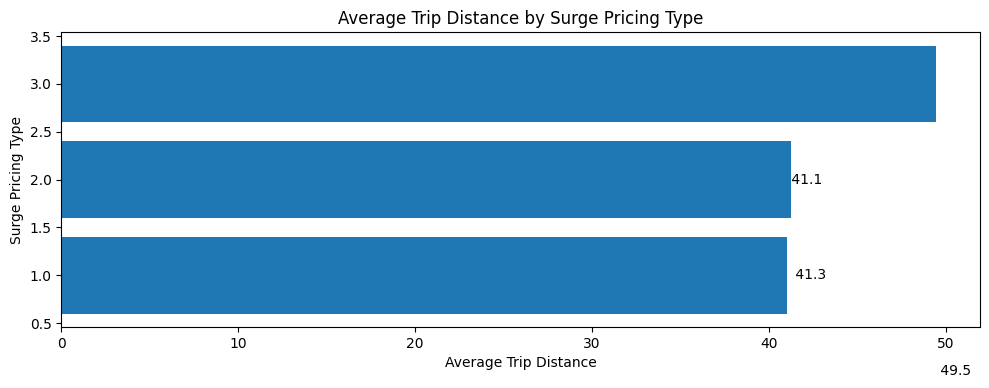

In [31]:
#chart percentage of surge_distance
plt.figure(figsize=(10,4))
plt.barh(surge_distance['Surge_Pricing_Type'], surge_distance['Trip_Distance'])
plt.xlabel('Average Trip Distance')
plt.ylabel('Surge Pricing Type')
plt.title('Average Trip Distance by Surge Pricing Type')
# value labels
for i, v in enumerate(surge_distance['Trip_Distance']):
    plt.text(v, i, f' {v:.1f}', va='center')
plt.tight_layout()
plt.show()

- Average distance for type 3 arround 49 Km
- Average distance for type 2 and 1 lower than 3, both arround 41 Km

##Surge Pricing Type by Cancelation Last 1 Month

In [32]:
#surge type class based on Cancellation_Last_1Month
surge_cancelation = data_1.groupby('Surge_Pricing_Type')['Cancellation_Last_1Month'].sum().reset_index()
surge_cancelation = surge_cancelation.sort_values('Cancellation_Last_1Month', ascending = False)
surge_cancelation

,Surge_Pricing_Type,Cancellation_Last_1Month
2,3,48822
1,2,40199
0,1,14049


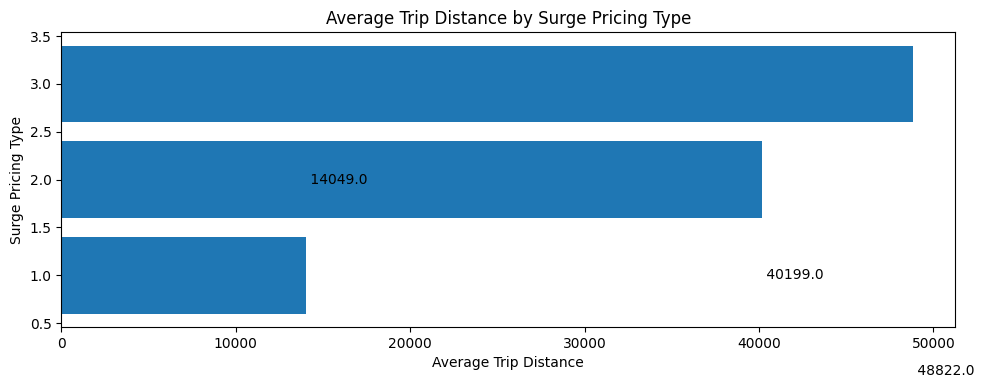

In [33]:
#chart percentage of surge_cancelation
plt.figure(figsize=(10,4))
plt.barh(surge_cancelation['Surge_Pricing_Type'], surge_cancelation['Cancellation_Last_1Month'])
plt.xlabel('Average Trip Distance')
plt.ylabel('Surge Pricing Type')
plt.title('Average Trip Distance by Surge Pricing Type')
# value labels
for i, v in enumerate(surge_cancelation['Cancellation_Last_1Month']):
    plt.text(v, i, f' {v:.1f}', va='center')
plt.tight_layout()
plt.show()

- For type 3 cancleation in last 1 month 48K
- Type 2 is arround 40K
- Type 1 is arround 14K

##Surge Pricing Type by Type of Cab

In [34]:
#surge type class based on Type_of_Cab
surge_cab = (
    data_1
      .groupby(['Surge_Pricing_Type', 'Type_of_Cab'], as_index=False)
      .agg(
          Total_Type_of_Cab=('Type_of_Cab', 'count')   # give a clear new column name
      )
      .sort_values('Type_of_Cab', ascending=True)
)

surge_cab


,Surge_Pricing_Type,Type_of_Cab,Total_Type_of_Cab
0,1,A,14916
5,2,A,2258
10,3,A,4395
1,1,B,9123
6,2,B,32497
11,3,B,9726
2,1,C,1037
7,2,C,17290
12,3,C,9795
3,1,D,1065


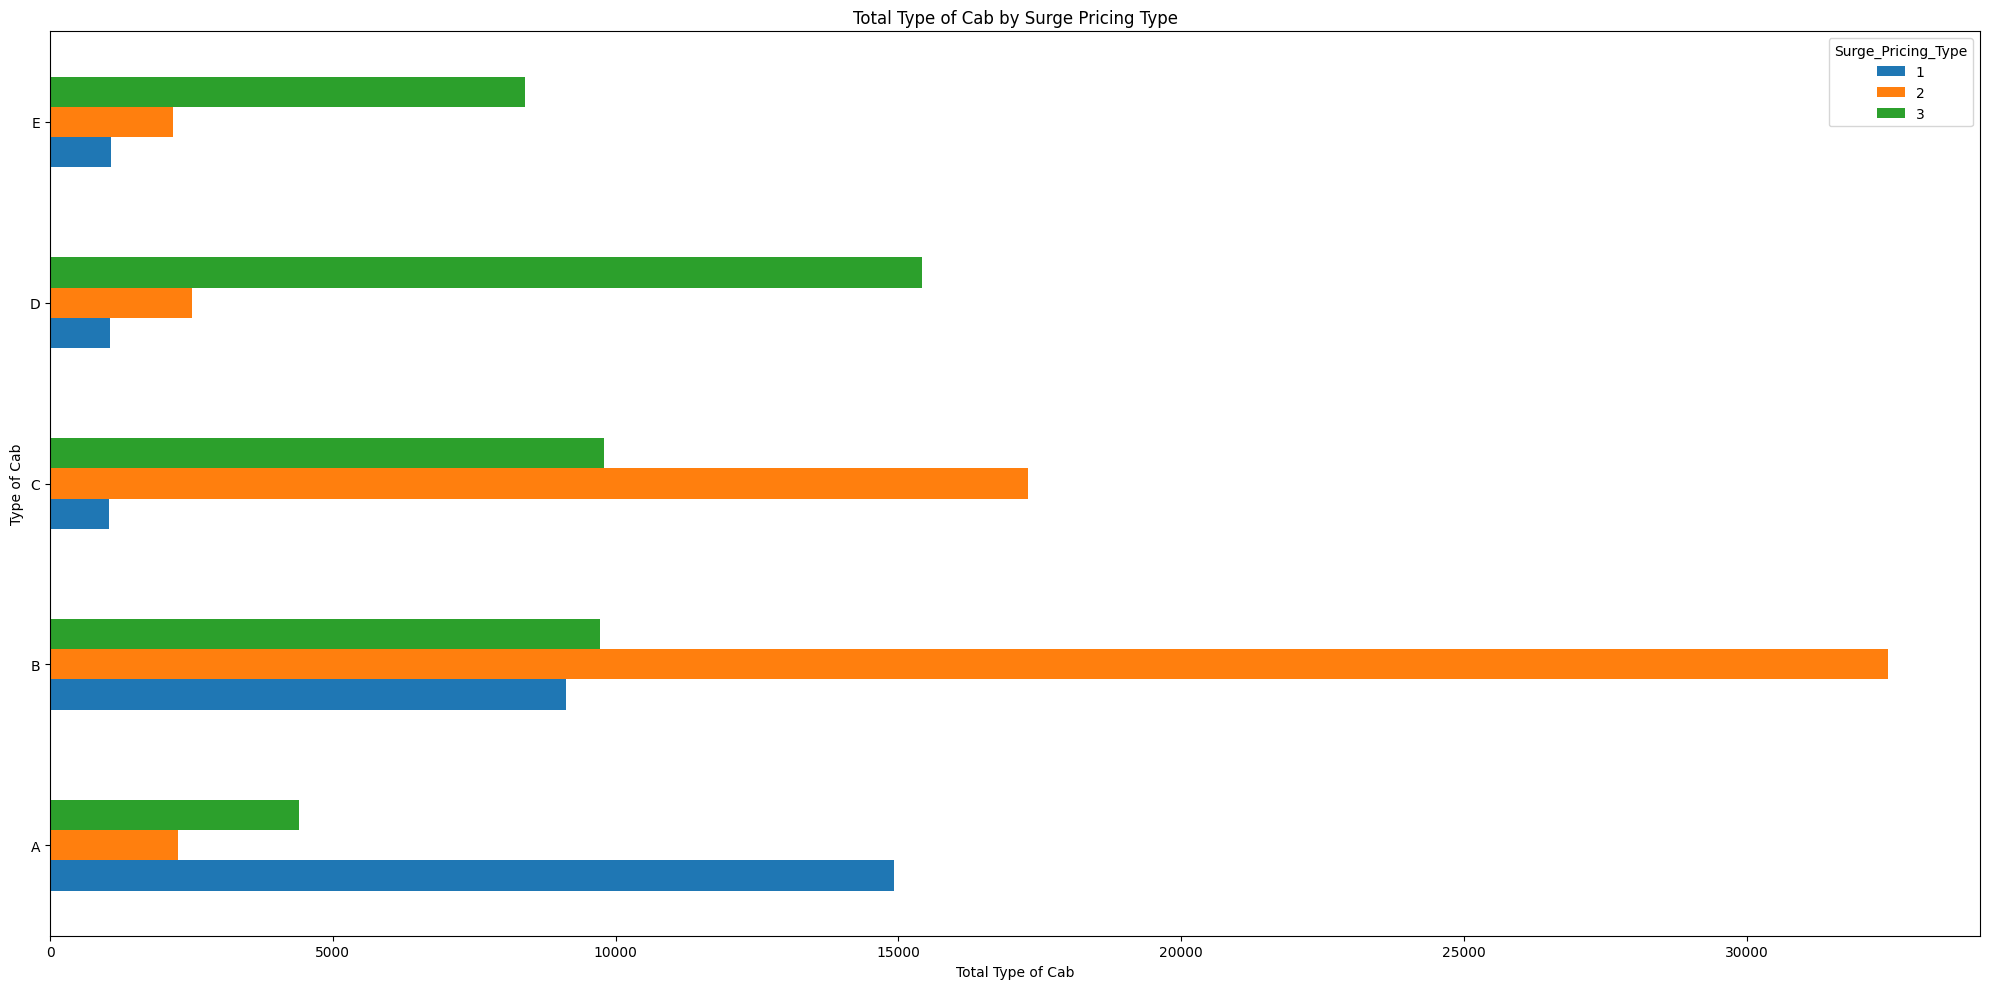

In [35]:
#cahrt vizualisation for total type of cab by surge priccing type
cab_list = (surge_cab.groupby('Type_of_Cab')['Total_Type_of_Cab']
              .sum().index)

plot_df = (surge_cab[surge_cab['Type_of_Cab'].isin(cab_list)]
           .pivot(index='Type_of_Cab', columns='Surge_Pricing_Type', values='Total_Type_of_Cab')
           .fillna(0))

ax = plot_df.plot(kind='barh', figsize=(20,10))
ax.set_xlabel('Total Type of Cab')
ax.set_ylabel('Type of Cab')
ax.set_title('Total Type of Cab by Surge Pricing Type')
plt.tight_layout()
plt.show()

- As We can see each Surge pricing type have different total of using type of cab
- Like type of surge pricing 2 alot using type of cab B
- Class 3 have huge amount using type of cab D

#Multicorelation

In [36]:
X_data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105329 entries, 126760 to 121958
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Gender_Male                     105329 non-null  int64  
 1   Type_of_Cab_A                   105329 non-null  int64  
 2   Type_of_Cab_B                   105329 non-null  int64  
 3   Type_of_Cab_C                   105329 non-null  int64  
 4   Type_of_Cab_D                   105329 non-null  int64  
 5   Type_of_Cab_E                   105329 non-null  int64  
 6   Confidence_Life_Style_Index_A   105329 non-null  uint8  
 7   Confidence_Life_Style_Index_B   105329 non-null  uint8  
 8   Confidence_Life_Style_Index_C   105329 non-null  uint8  
 9   Destination_Type_A              105329 non-null  uint8  
 10  Destination_Type_B              105329 non-null  uint8  
 11  Destination_Type_C              105329 non-null  uint8  
 12  Destination_Type

##VIF Score

In [38]:
#calculate VIF scores
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

X_data_train_col = X_data_train[X_data_train.select_dtypes(include = ['int64', 'float64']).columns.tolist()]
X = add_constant(X_data_train_col)
vif_data = pd.DataFrame([vif(X.values, i)
               for i in range(X.shape[1])],
              index=X.columns).reset_index()
vif_data.columns = ['feature','vif_score']
vif_data = vif_data.loc[vif_data.feature!='const']
vif_data

/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,vif_score
1,Gender_Male,1.000048
2,Type_of_Cab_A,inf
3,Type_of_Cab_B,inf
4,Type_of_Cab_C,inf
5,Type_of_Cab_D,inf
6,Type_of_Cab_E,inf
7,Trip_DistanceScaled,1.343493
8,Customer_Since_MonthsScaled,1.040743
9,Life_Style_IndexScaled,1.532936
10,Customer_RatingScaled,1.236558


If VIF score is high there are multicollinearity

- VIF = 1 -> No

- VIF = 4 - 10 -> Moderate

- VIF > 10 -> High

Lower VIF score its good

Because all of Type of Cab had infintiy score, We will dropeed on of them and recheck VIF Score

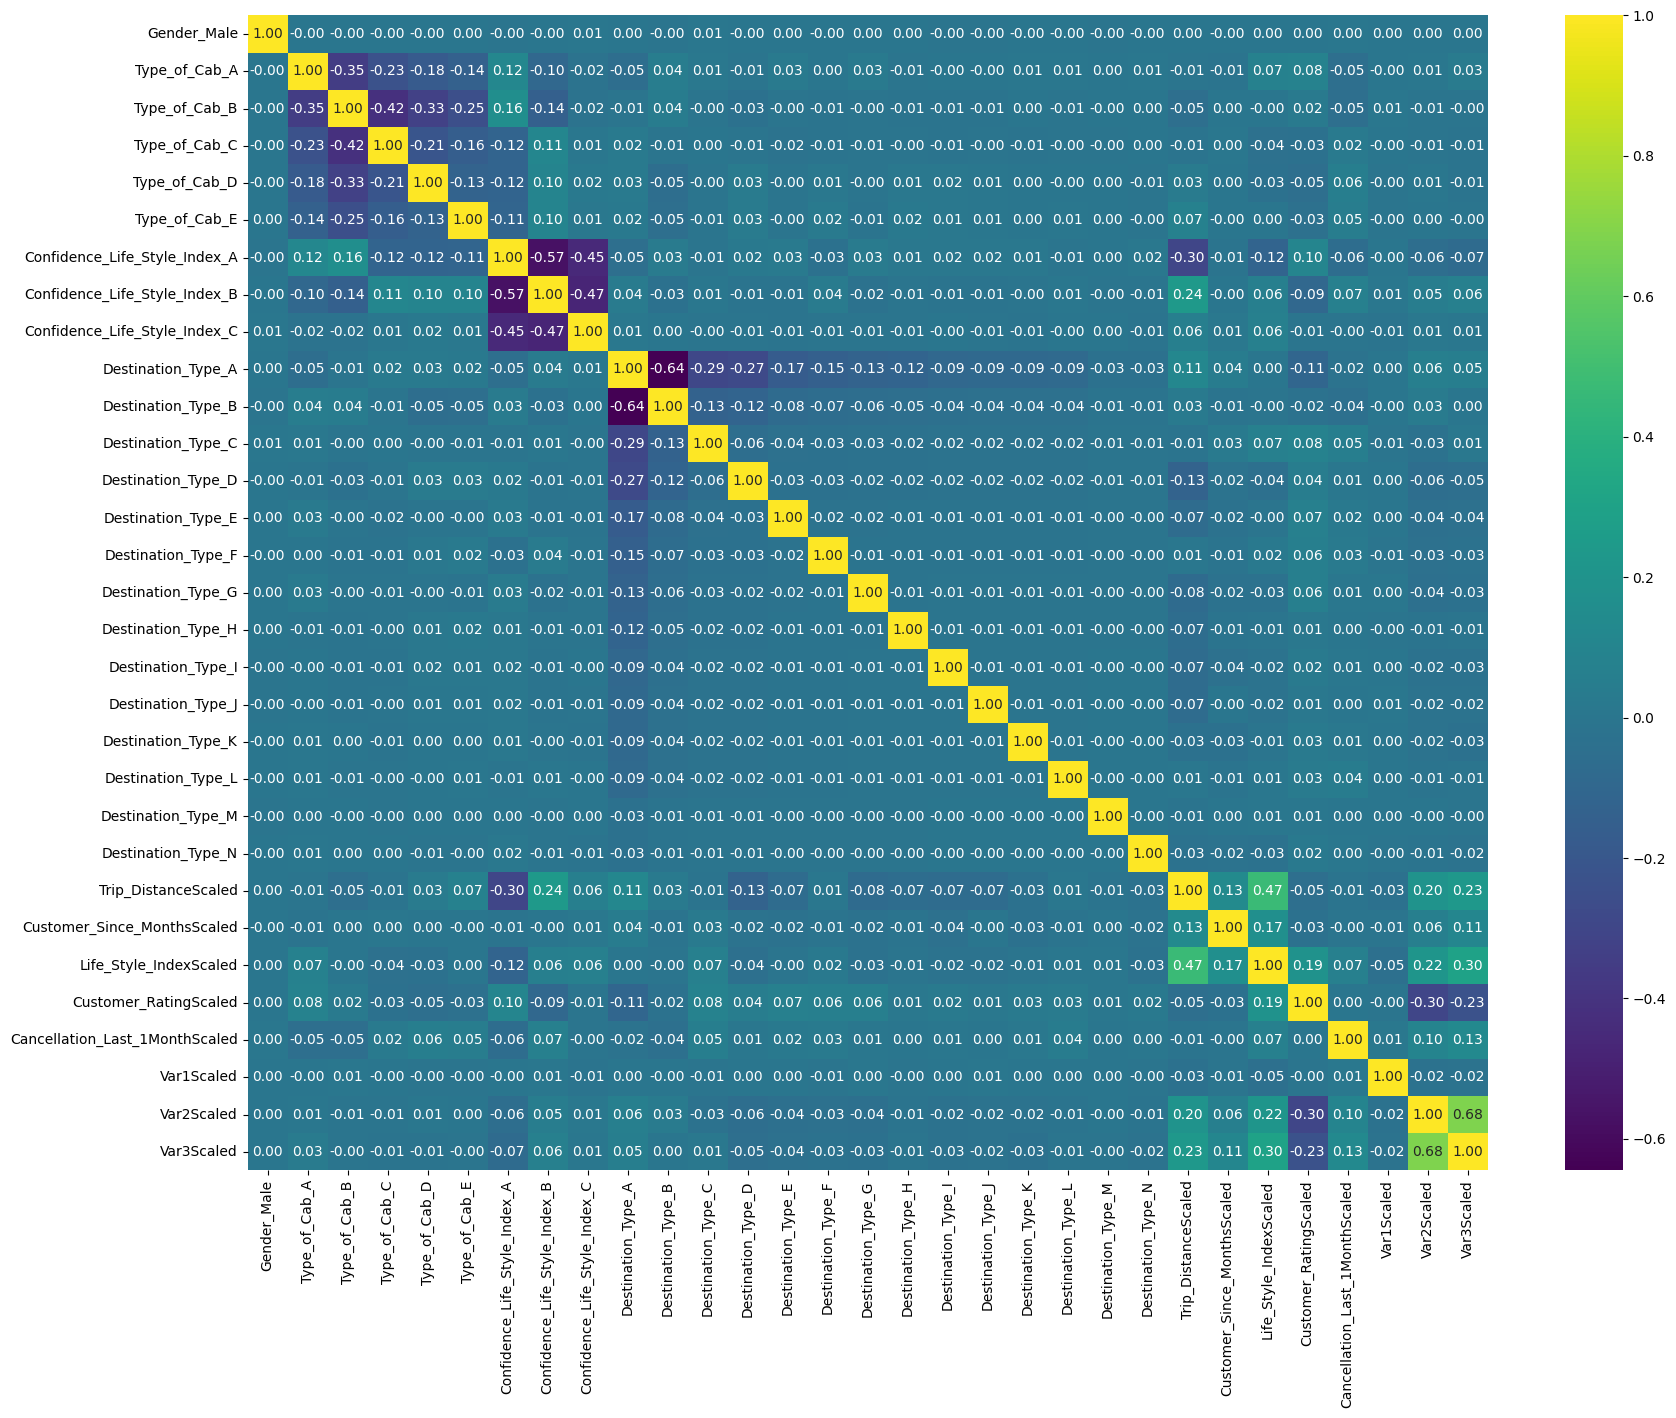

In [ ]:
#heatmap correlation
X_data_train_col = X_data_train[X_data_train.select_dtypes(exclude = 'object').columns.tolist()]

corr = X_data_train_col.corr()

plt.figure(figsize=(20,15))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='viridis')
plt.show()

As We can see from VIF Score and heat map for check multicorelation in category features:
- Confidence_Life_Style_Index_C have moderate corelation with Confidence_Life_Style_Index_A (-0.45), and Confidence_Life_Style_Index_B (-0.47)

- Destination_Type_C also had moderate correlation with Destination_Type_B (-0.64)

- Var3 have moderate corelation with Var2 (0.68)

##Drop Multicorelation Features

In [ ]:
#drop all multicorelation features
list_col_multi = ['Type_of_Cab_C', 'Confidence_Life_Style_Index_B', 'Confidence_Life_Style_Index_C', 'Destination_Type_A', 'Var3Scaled']

for x in list_col_multi:
  X_data_train = X_data_train.drop(columns=x)
  X_data_test = X_data_test.drop(columns=x)

In [ ]:
#rechecl VIF Score
X_data_train_col = X_data_train[X_data_train.select_dtypes(include = ['int64', 'float64']).columns.tolist()]
X = add_constant(X_data_train_col)
vif_data = pd.DataFrame([vif(X.values, i)
               for i in range(X.shape[1])],
              index=X.columns).reset_index()
vif_data.columns = ['feature','vif_score']
vif_data = vif_data.loc[vif_data.feature!='const']
vif_data

,feature,vif_score
1,Gender_Male,1.000040
2,Type_of_Cab_A,1.498827
3,Type_of_Cab_B,1.732642
4,Type_of_Cab_D,1.436846
5,Type_of_Cab_E,1.294595
6,Trip_DistanceScaled,1.342099
7,Customer_Since_MonthsScaled,1.036834
8,Life_Style_IndexScaled,1.481932
9,Customer_RatingScaled,1.225497
10,Cancellation_Last_1MonthScaled,1.026988


- As We can see righ here afrte We dropped one feature of Type of Cab infinity of VIF score already change, and all of them are low score which is good
- Now We will check with heatmap

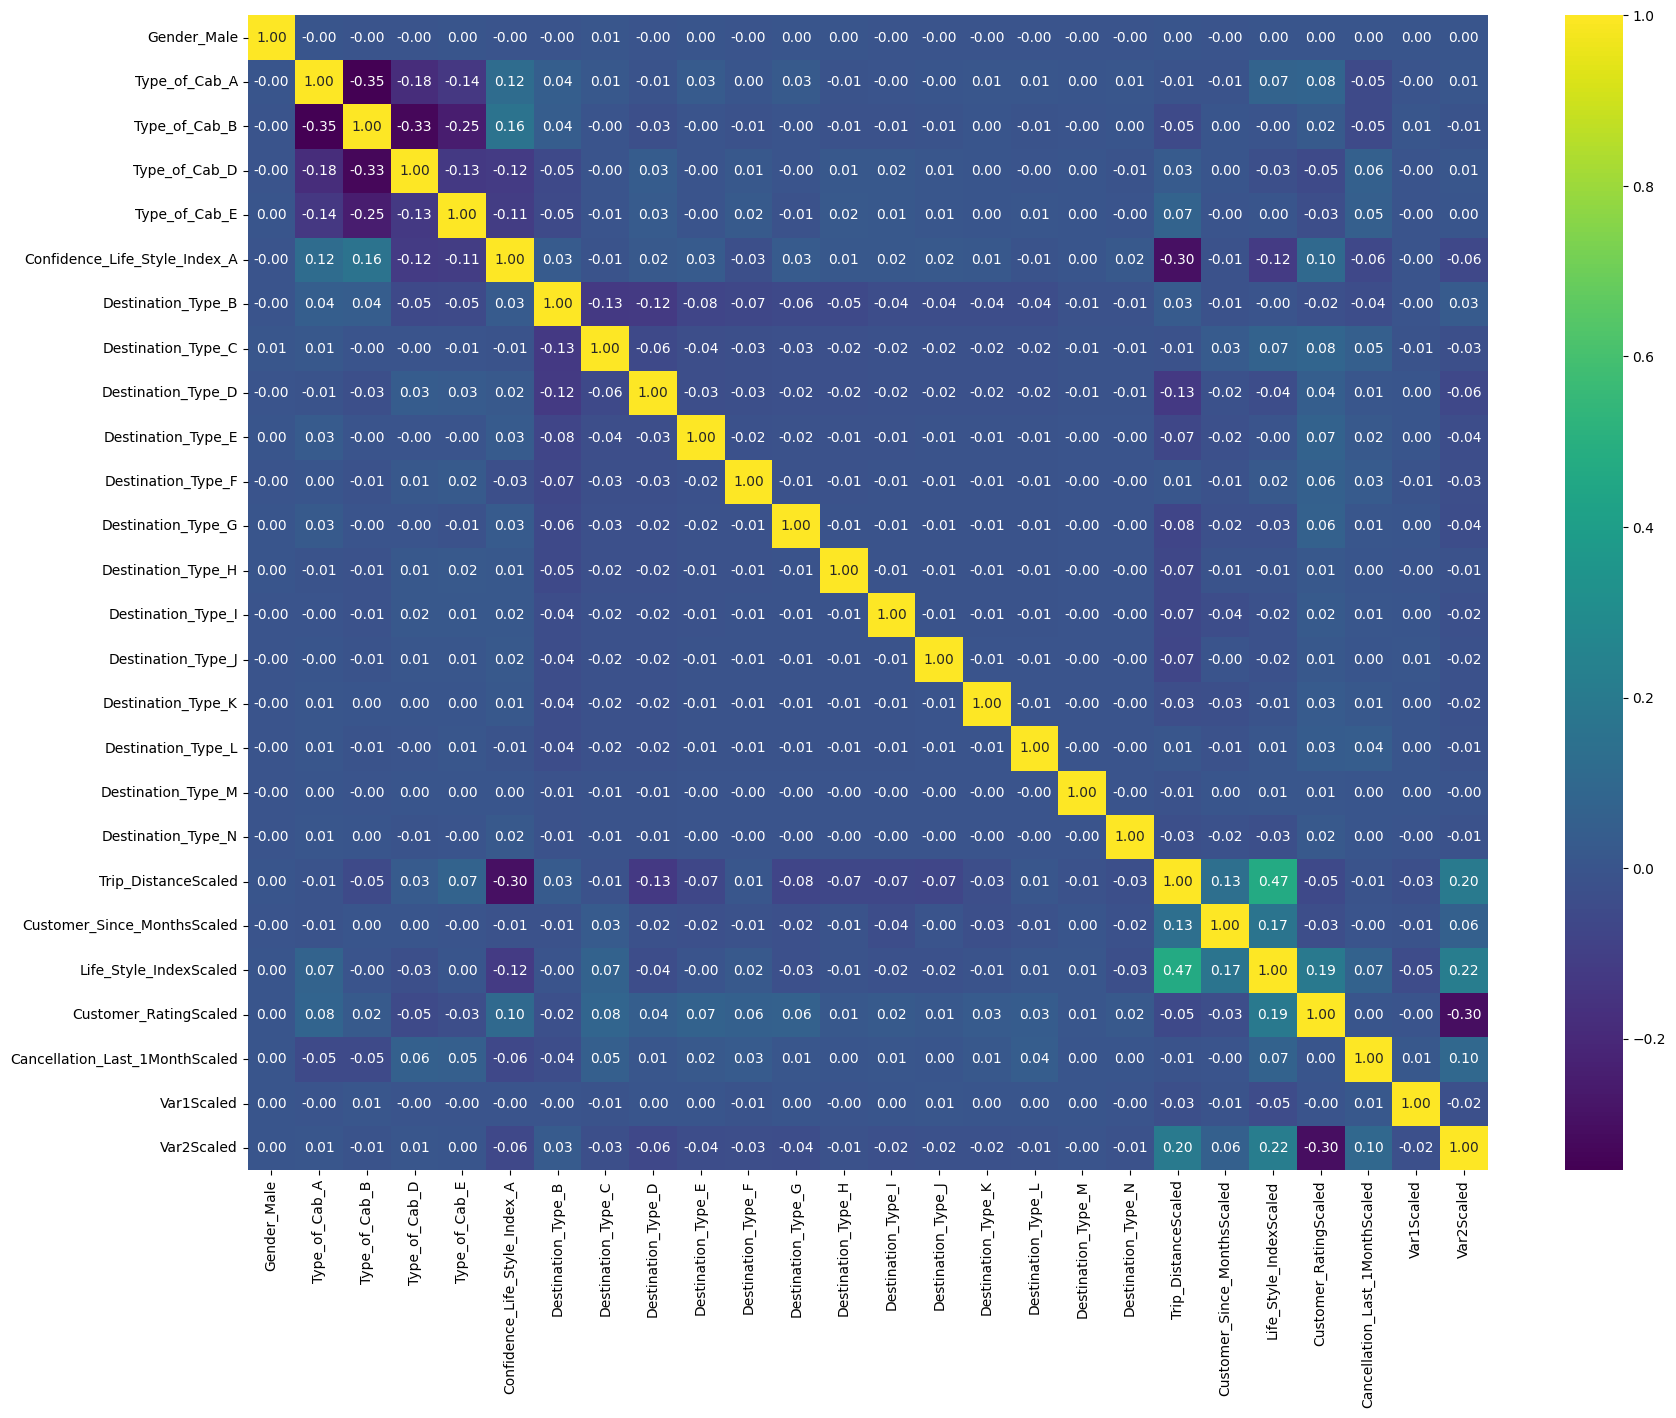

In [ ]:
#recheck heatmap
X_data_train_col = X_data_train[X_data_train.select_dtypes(exclude = 'object').columns.tolist()]

corr = X_data_train_col.corr()

plt.figure(figsize=(20,15))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='viridis')
plt.show()

We have been handling multicorelation for numerical and categorical and we ready jump into encoding stuff

#Handle Imbalance

In [ ]:
#evidence data imbalance
class_value = y_data_train.value_counts().reset_index()
total_churn = len(y_data_train)
class_value['percentage'] = (class_value['count'] / total_churn) * 100
class_value

,Surge_Pricing_Type,count,percentage
0,2,45343,43.048923
1,3,38177,36.245478
2,1,21809,20.705599


- We can see how ditribution of data classifications it's not balance, so We will handle imbalance with SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

#balancing dataset
X_smote, y_smote = SMOTE(random_state=42).fit_resample(X_data_train, y_data_train)

In [ ]:
#recheck data
print(f'Data X Before balancing: {len(X_data_train)}')
print(f'Data X After balancing: {len(X_smote)}')
print(f'Data y Before balancing: {len(y_data_train)}')
print(f'data y After balancing: {len(y_smote)}')

Data X Before balancing: 105329
Data X After balancing: 136029
Data y Before balancing: 105329
data y After balancing: 136029


- Data have been balancing with SMOTE

In [ ]:
#make data train into numpy
X_smote_numpy = X_smote.to_numpy()
y_smote_numpy = y_smote.to_numpy()

As We can see righ here, We already have final data that we can use for modeling

#Model before Tunning

## kNN

###Training

In [ ]:
#train kNN
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

model_kNN = KNeighborsClassifier(n_neighbors = 4)
model_kNN.fit(X_smote_numpy, y_smote_numpy)

/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=4)

###Model Evaluation

####Training

In [ ]:
#evaluate validation
y_train_pred = model_kNN.predict(X_data_train)
print(classification_report(y_data_train, y_train_pred))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

           1       0.60      0.92      0.73     21809
           2       0.77      0.71      0.74     45343
           3       0.84      0.65      0.73     38177

    accuracy                           0.73    105329
   macro avg       0.74      0.76      0.73    105329
weighted avg       0.76      0.73      0.73    105329



As we can see here for data validation with kNN:
- Accuracy: 0.73 (73%) the model predicts the correct surge class for about 73 % of orders.

- Macro F1: 0.73, Macro Recall: 0.76 these are fairly balanced across classes, meaning the model isn’t focusing only on the largest class.

- Weighted F1: 0.73 because class sizes differ, the weighted score is similar to macro, confirming no single class is dominating.

####Testing

In [ ]:
#evaluate testing
y_testing_pred = model_kNN.predict(X_data_test)
print(classification_report(y_data_test, y_testing_pred))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

           1       0.43      0.68      0.53      5405
           2       0.60      0.56      0.58     11385
           3       0.68      0.50      0.58      9543

    accuracy                           0.56     26333
   macro avg       0.57      0.58      0.56     26333
weighted avg       0.59      0.56      0.57     26333



We can see here for data test with kNN:
- Accuracy: 0.56 (56 %) significantly lower than the 73 % you saw on training → model over fitted.

- Macro-F1: 0.56  similar drop, the model is struggling to generalize.

- Weighted-F1: 0.57 close to macro-F1, so all three classes are affected.

##Random Forest

###Training

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
  n_estimators = 100,
  max_depth = 5,
  random_state = 11,
)

model.fit(X_smote_numpy, y_smote_numpy)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=5, random_state=11)

###Evaluation

####Training

In [ ]:
#evaluation validation
y_train_pred = model.predict(X_data_train)
print(classification_report(y_data_train, y_train_pred))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

           1       0.69      0.55      0.61     21809
           2       0.64      0.74      0.69     45343
           3       0.67      0.61      0.64     38177

    accuracy                           0.66    105329
   macro avg       0.67      0.64      0.65    105329
weighted avg       0.66      0.66      0.65    105329



We can see here for data validation with Random Forest:
- Accuracy: 0.66 (66 %) model can predicted surge class arround 66% correct
- Macro F1: 0.65, Macro Recall: 0.64 these are fairly balanced across classes, meaning the model isn’t focusing only on the largest class.
- Weighted F1: 0.65 because class sizes differ, the weighted score is similar to macro, confirming no single class is dominating.

####Testing

In [ ]:
#evaluatiin testing
y_testing_pred = model.predict(X_data_test)
print(classification_report(y_data_test, y_testing_pred))

              precision    recall  f1-score   support

           1       0.69      0.55      0.61      5405
           2       0.64      0.74      0.69     11385
           3       0.67      0.62      0.65      9543

    accuracy                           0.66     26333
   macro avg       0.67      0.64      0.65     26333
weighted avg       0.66      0.66      0.66     26333



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


As we can see here for data test with Random Forest:
- Accuracy: 0.66 (66 %) there is no differ with train result, so model is fit
- Macro-F1: 0.65 same score for test and train, which is model 65% can predict class .
- Weighted-F1: 0.66 slightly improved than train, no one class is dominating

##Logistic Regression

###Training

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
  penalty = 'l2',
  C = 10,
  solver = 'liblinear',
  random_state = 11,
)

model.fit(X_smote_numpy, y_smote_numpy)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=10, random_state=11, solver='liblinear')

###Evaluation

####Training

In [ ]:
#evaluation validation
y_train_pred = model.predict(X_data_train)
print(classification_report(y_data_train, y_train_pred))

              precision    recall  f1-score   support

           1       0.64      0.60      0.62     21809
           2       0.64      0.76      0.70     45343
           3       0.72      0.59      0.65     38177

    accuracy                           0.66    105329
   macro avg       0.67      0.65      0.65    105329
weighted avg       0.67      0.66      0.66    105329



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


As we can see here for data validation with Logistic Regression:
- Accuracy: 0.66 (66 %) model can predicted surge class arround 66% correct
- Macro F1: 0.65, Macro Recall: 0.65 these are fairly balanced across classes, meaning the model isn’t focusing only on the largest class.
- Weighted F1: 0.65 because class sizes differ, the weighted score is similar to macro, confirming no single class is dominating.

####Testing

In [ ]:
#evaluation testing
y_testing_pred = model.predict(X_data_test)
print(classification_report(y_data_test, y_testing_pred))

              precision    recall  f1-score   support

           1       0.58      0.65      0.61      5405
           2       0.64      0.74      0.69     11385
           3       0.74      0.55      0.63      9543

    accuracy                           0.65     26333
   macro avg       0.65      0.65      0.64     26333
weighted avg       0.66      0.65      0.65     26333



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


As we can see here for data test with Logistic Regression:
- Accuracy: 0.65 (65%) there is no differ with train result, so model is fit.
- Macro-F1: 0.64 lower than train score, which is model 64% can predict class.
- Weighted-F1: 0.65 slightly improved than train, no one class is dominating

#Model Orign Comparasion

In [ ]:
#compare recall value for each model
model_orign = [
    ["kNN", "Train", 0.73, 0.73, 0.73],
    ["kNN", "Test", 0.56, 0.56, 0.57],
    ["Random Forest", "Train", 0.66, 0.65, 0.65],
    ["Random Forest", "Test", 0.66, 0.65, 0.66],
    ["Logistic Regression", "Train", 0.66, 0.65, 0.65],
    ["Logistic Regression", "Test", 0.65, 0.64, 0.65]
]

columns = ["Model", "Dataset", "Accuracy", "Macro-F1", "Weight-F1"]

model_comparison = pd.DataFrame(model_orign, columns=columns)

model_comparison

,Model,Dataset,Accuracy,Macro-F1,Weight-F1
0,kNN,Train,0.73,0.73,0.73
1,kNN,Test,0.56,0.56,0.57
2,Random Forest,Train,0.66,0.65,0.65
3,Random Forest,Test,0.66,0.65,0.66
4,Logistic Regression,Train,0.66,0.65,0.65
5,Logistic Regression,Test,0.65,0.64,0.65


- Random Forest became the best model with Accuracy, F1, and Weighted score nearly same, but We wilm tunning all model with GridSearch to see whether does any improvement

#Model with Tunning

##kNN

###Training with tunning

In [ ]:
#define the estimator/model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn_clf = KNeighborsClassifier()

In [ ]:
#hyperparameter tuning
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_neighbors': (4,5,6),
    'weights': ['distance'],
    'metric': ['minkowski','manhattan']
}

knn_clf_gridcv = GridSearchCV(knn_clf, parameters, cv=5, scoring='f1_macro')
knn_clf_gridcv.fit(X_smote_numpy, y_smote_numpy)

/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'manhattan'],
                         'n_neighbors': (4, 5, 6), 'weights': ['distance']},
             scoring='f1_macro')

- We havenn trained data train with kNN that tunned with GridSearch

In [ ]:
#the compact results
cv_result = pd.DataFrame(knn_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols]

,params,mean_test_score,rank_test_score
0,"{'metric': 'minkowski', 'n_neighbors': 4, 'wei...",0.703367,4
1,"{'metric': 'minkowski', 'n_neighbors': 5, 'wei...",0.702350,5
2,"{'metric': 'minkowski', 'n_neighbors': 6, 'wei...",0.702120,6
3,"{'metric': 'manhattan', 'n_neighbors': 4, 'wei...",0.707377,2
4,"{'metric': 'manhattan', 'n_neighbors': 5, 'wei...",0.706963,3
5,"{'metric': 'manhattan', 'n_neighbors': 6, 'wei...",0.707492,1


Based on table above We can see that parameters are
- metric='manhattan'
- n_neighbors=6
- weights='distance

###Evaluation

####Training

In [ ]:
#classification report
from sklearn.metrics import classification_report

y_pred = knn_clf_gridcv.best_estimator_.predict(X_data_train)
print(classification_report(y_data_train, y_pred))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

           1       1.00      1.00      1.00     21809
           2       1.00      1.00      1.00     45343
           3       1.00      1.00      1.00     38177

    accuracy                           1.00    105329
   macro avg       1.00      1.00      1.00    105329
weighted avg       1.00      1.00      1.00    105329



As we can see here for data Training with kNN use GridSearch:

- Accuracy: 1.00 (100 %) model can predicted surge class arround 100% correct
- Macro F1: 1.00, Macro Recall: 1.00 these are fairly balanced across classes, meaning the model isn’t focusing only on the largest class.
- Weighted F1: 1.00 because class sizes differ, the weighted score is similar to macro, confirming no single class is dominating.

####Testing

In [ ]:
#classification report
from sklearn.metrics import classification_report

y_test_pred = knn_clf_gridcv.best_estimator_.predict(X_data_test)
print(classification_report(y_data_test, y_test_pred))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

           1       0.48      0.63      0.55      5405
           2       0.62      0.59      0.61     11385
           3       0.65      0.58      0.62      9543

    accuracy                           0.60     26333
   macro avg       0.59      0.60      0.59     26333
weighted avg       0.61      0.60      0.60     26333



As we can see here for data test with kNN use GridSearch:

- Accuracy: 0.60 (60%) there is no differ with train result, so model is overfit.
- Macro-F1: 0.59 lower than train score, which is model 59% can predict class.
- Weighted-F1: 0.60 slightly improved than train, no one class is dominating

##Random Forest

###Training with tunning

In [ ]:
#define random forest classifier model
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': [30,40,50],
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [3, 5],
    'max_features': ['sqrt']
}

# note: we use recall
rf_clf_gridcv = GridSearchCV(rf_clf, parameters, cv=5, scoring='f1_macro')
rf_clf_gridcv.fit(X_smote_numpy, y_smote_numpy)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, 15], 'max_features': ['sqrt'],
                         'min_samples_leaf': [3, 5],
                         'n_estimators': [30, 40, 50]},
             scoring='f1_macro')

- We already ran data train with Random Forest plus tunned with GridSearch

In [ ]:
#the results
cv_result = pd.DataFrame(rf_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
14,"{'max_depth': 15, 'max_features': 'sqrt', 'min...",0.679251,1
12,"{'max_depth': 15, 'max_features': 'sqrt', 'min...",0.679181,2
13,"{'max_depth': 15, 'max_features': 'sqrt', 'min...",0.678716,3
17,"{'max_depth': 15, 'max_features': 'sqrt', 'min...",0.678488,4
16,"{'max_depth': 15, 'max_features': 'sqrt', 'min...",0.678119,5
15,"{'max_depth': 15, 'max_features': 'sqrt', 'min...",0.677922,6
11,"{'max_depth': 10, 'max_features': 'sqrt', 'min...",0.661749,7
10,"{'max_depth': 10, 'max_features': 'sqrt', 'min...",0.661683,8
9,"{'max_depth': 10, 'max_features': 'sqrt', 'min...",0.661556,9
7,"{'max_depth': 10, 'max_features': 'sqrt', 'min...",0.661507,10


Based on table above, We can draw conclude the best:
- max_depth=15
- min_samples_leaf=3
- n_estimators=50

###Evaluation

####Training

In [ ]:
#classification report
from sklearn.metrics import classification_report

y_pred = rf_clf_gridcv.best_estimator_.predict(X_data_train)
print(classification_report(y_data_train, y_pred))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

           1       0.75      0.61      0.68     21809
           2       0.67      0.86      0.75     45343
           3       0.81      0.64      0.71     38177

    accuracy                           0.73    105329
   macro avg       0.75      0.70      0.71    105329
weighted avg       0.74      0.73      0.72    105329



As we can see here for data validation with Random Forest use GridSearch:

- Accuracy: 0.73 (73 %) model can predicted surge class arround 73% correct
- Macro F1: 0.71, Macro Recall: 0.70 these are fairly balanced across classes, meaning the model isn’t focusing only on the largest class.
- Weighted F1: 0.72 because class sizes differ, the weighted score is similar to macro, confirming no single class is dominating.

####Testing

In [ ]:
#classification report
from sklearn.metrics import classification_report

y_pred = rf_clf_gridcv.best_estimator_.predict(X_data_test)
print(classification_report(y_data_test, y_pred))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

           1       0.64      0.60      0.62      5405
           2       0.64      0.78      0.70     11385
           3       0.75      0.57      0.65      9543

    accuracy                           0.67     26333
   macro avg       0.68      0.65      0.66     26333
weighted avg       0.68      0.67      0.67     26333



As we can see here for data test with Random Forest use GridSearch:

- Accuracy: 0.67 (67%) there is no differ with train result, so model is overfit.
- Macro-F1: 0.66 lower than train score, which is model 66% can predict class.
- Weighted-F1: 0.67 lower than train, no one class is dominating

##Logistic Regression

###Training with tunning

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(random_state=42)

parameters = {
    'solver': ['liblinear', 'saga', 'lbfgs'],
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10],
    'multi_class': ['multinomial']
}

lr_clf_gridcv = GridSearchCV(lr_clf, parameters, cv=5, scoring='f1_macro')
lr_clf_gridcv.fit(X_smote_numpy, y_smote_numpy)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will 

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'multi_class': ['multinomial'],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga', 'lbfgs']},
             scoring='f1_macro')

- Data train have been trined with Logistic regressioin plus GridSearch

In [ ]:
#the results
cv_result = pd.DataFrame(lr_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
4,"{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}",0.967416,1
6,"{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}",0.967184,2
7,"{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}",0.966787,3
2,"{'C': 0.1, 'penalty': 'l1', 'solver': 'libline...",0.966555,4
5,"{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}",0.964833,5
3,"{'C': 0.1, 'penalty': 'l2', 'solver': 'libline...",0.947647,6
1,"{'C': 0.01, 'penalty': 'l2', 'solver': 'liblin...",0.885889,7
0,"{'C': 0.01, 'penalty': 'l1', 'solver': 'liblin...",0.837377,8


Based on table above, We can see that the best parameter:
- C=0.1
- multi_class='multinomial'
- penalty='l1'
- solver='saga'

###Evaluation

####Training

In [ ]:
#classification report
from sklearn.metrics import classification_report

y_pred = lr_clf_gridcv.best_estimator_.predict(X_data_train)
print(classification_report(y_data_train, y_pred))

              precision    recall  f1-score   support

           1       0.63      0.61      0.62     21809
           2       0.64      0.74      0.69     45343
           3       0.72      0.60      0.65     38177

    accuracy                           0.66    105329
   macro avg       0.66      0.65      0.65    105329
weighted avg       0.67      0.66      0.66    105329



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


As we can see here for data validation with Random Forest use GridSearch:

- Accuracy: 0.66 (66 %) model can predicted surge class arround 66% correct
- Macro F1: 0.65, Macro Recall: 0.65 these are fairly balanced across classes, meaning the model isn’t focusing only on the largest class.
- Weighted F1: 0.66 because class sizes differ, the weighted score is similar to macro, confirming no single class is dominating.

####Testing

In [ ]:
#classification report
from sklearn.metrics import classification_report

y_pred = lr_clf_gridcv.best_estimator_.predict(X_data_test)
print(classification_report(y_data_test, y_pred))

              precision    recall  f1-score   support

           1       0.56      0.67      0.61      5405
           2       0.64      0.71      0.67     11385
           3       0.74      0.56      0.64      9543

    accuracy                           0.65     26333
   macro avg       0.65      0.65      0.64     26333
weighted avg       0.66      0.65      0.65     26333



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


As we can see here for data validation with Random Forest use GridSearch:

- Accuracy: 0.65 (65%) there is no differ with train result, so model is overfit.
- Macro-F1: 0.64 lower than train score, which is model 64% can predict class.
- Weighted-F1: 0.65 slightly lower than train, no one class is dominating

#Model Tunning Comparasion

In [ ]:
model_tunning = [
    ["kNN", "GridSearch", "Train", 1.00,  1.00, 1.00],
    ["kNN", "GridSearch", "Test", 0.60,  0.59, 0.60],
    ["Random Forest", "GridSearch", "Train", 0.73, 0.71, 0.72],
    ["Random Forest", "GridSearch", "Test", 0.66, 0.67, 0.66],
    ["Logistic Regression", "GridSearch", "Train", 0.66, 0.65, 0.66],
    ["Logistic Regression", "GridSearch", "Test", 0.65, 0.64, 0.65],
]

columns = ["Model", "Hyperparameter", "Dataset", "Accuracy", "Macro-F1", "Weight-F1"]

model_comparison = pd.DataFrame(model_tunning, columns=columns)

model_comparison

,Model,Hyperparameter,Dataset,Accuracy,Macro-F1,Weight-F1
0,kNN,GridSearch,Train,1.00,1.00,1.00
1,kNN,GridSearch,Test,0.60,0.59,0.60
2,Random Forest,GridSearch,Train,0.73,0.70,0.72
3,Random Forest,GridSearch,Test,0.66,0.67,0.66
4,Logistic Regression,GridSearch,Train,0.66,0.65,0.66
5,Logistic Regression,GridSearch,Test,0.65,0.64,0.65


In [ ]:
# Filter rows where Dataset == "Test" and Hyperparameter == "Tuning"
filtered = model_comparison[
    (model_comparison["Dataset"] == "Test") &
    (model_comparison["Hyperparameter"] == "GridSearch")
]

# Sort by Recall (1) in descending order
best_test_model = filtered.sort_values("Macro-F1", ascending=False)

# Show the result
best_test_model

,Model,Hyperparameter,Dataset,Accuracy,Macro-F1,Weight-F1
3,Random Forest,GridSearch,Test,0.66,0.67,0.66
5,Logistic Regression,GridSearch,Test,0.65,0.64,0.65
1,kNN,GridSearch,Test,0.60,0.59,0.60


##Conclusion

We have been training 3 model to get to know where is the finest model, model such like:
- KNN
- Random Forest
- Logistic Regression

All mode training with GridSeacrh parameter tunning that can enhanced model performance to predicting our customers class

**Random Forest** is the best model than others, since this model have great Accuracy 66% to predict multiclass of customers

Based on SHAP method for XGBoost We can see that there are few features were hve hugfe effected towards customers churn:
- Order Status Delivered: This feature shows that customers who had their last order marked as Delivered are more likely to churn (red dots on the positive side). Meanwhile, customers without “Delivered” status (blue dots) are less likely to churn.

- Customer Segment Potential Loyalist: Red dots (Potential Loyalist = 1) → cluster on the positive side → being in this segment increases churn risk.
Blue dots (Not in Potential Loyalist) → cluster on the negative side → these customers are more stable.

- Frequency: Blue dots (low frequency) on the positive side, customers with fewer visits are more likely to churn.
Red dots (high frequency) mostly on the negative side, frequent visitors tend to stay, reducing churn.

- Shipping Method Express, and Sameday: Express Shipping (red = used) on the positive side, customers who chose express are at higher churn risk.
Sameday Shipping (red = used) also on the positive side, same effect.

#Features Importance

##SHAP of Random Forest

In [ ]:
import shap

# Get the tuned RF model
model = rf_clf_gridcv.best_estimator_

# Create a SHAP explainer for tree-based models
explainer = shap.TreeExplainer(model)

# Compute SHAP values for your input data (use test set for interpretation)
shap_values = explainer.shap_values(X_data_test)      # better to use X_test, not full SMOTE data
explanation = explainer(X_data_test)

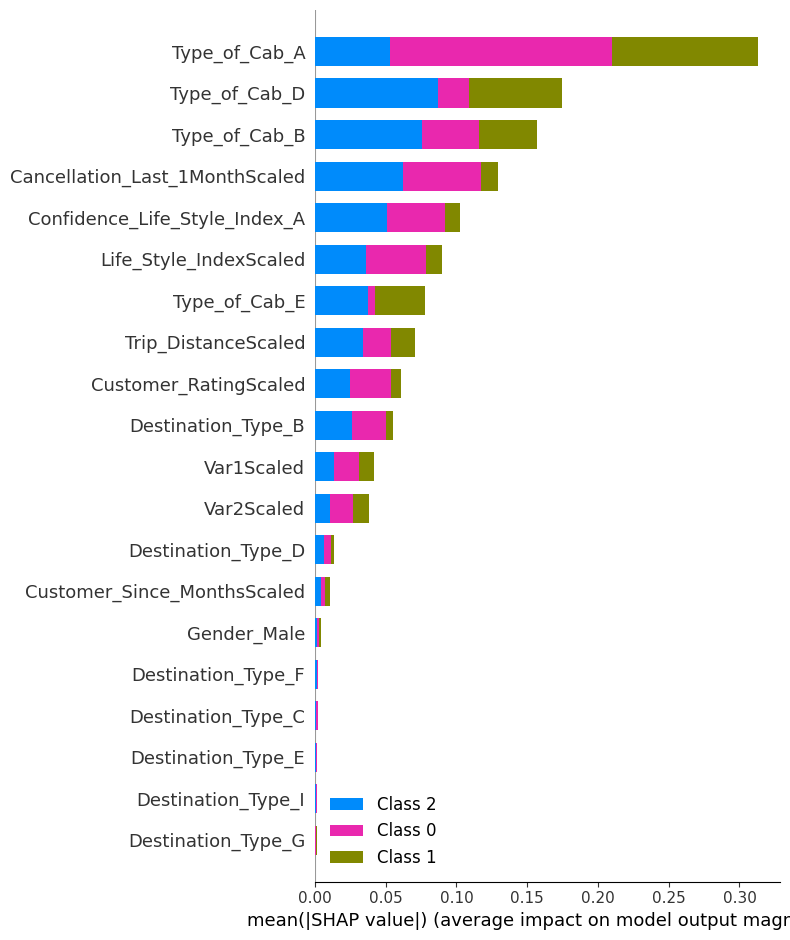

In [ ]:
#global feature importance
shap.summary_plot(shap_values, X_data_test, plot_type="bar")

#Insight & Reccomendations Bussines

The X axis is mean SHAP value: the average magnitude of each feature’s contribution to the model’s predictions across all samples.
- Bigger bars = more influential features.

The stacked colors → how much each feature contributes to each class:

- Blue = Class 2 (Surge type 3 if your original labels were shifted)

- Pink = Class 0 (Surge type 1)

- Green = Class 1 (Surge type 2)

The order features are sorted top to bottom by total impact.

Top drivers of surge classification

- Type_of_Cab (A, D, B) by far the strongest driver; cab category is the most predictive of surge type.

- Cancellation_Last_1MonthScaled, customer’s cancellation history also influences surge pricing.

- Confidence_Life_Style_Index_A & Life_Style_IndexScaled, customer profile/segment features matter next.

- Trip_DistanceScaled & Customer_RatingScaled – trip distance and customer satisfaction have moderate impact.

- Destination_Type_B/E & Var1/Var2, contribute smaller but still noticeable effects.

- Customer_Since_MonthsScaled & Gender_Male, least influence overall.

**Cab Type, The Primary Driver of Surge**

- Type_of_Cab_A, Type_of_Cab_D, and Type_of_Cab_B are the three most influential factors.

- Cab A bar is the longest overall, mostly Green + Pink, meaning it drives the model to distinguish Medium surge vs. Low surge.

- Cab D and Cab B show higher shares for Medium and High surge (green & blue).

- Cab type determines supply demand balance: some vehicles are scarcer or more in demand, pushing trips toward higher surge.

Reccomendation:
- Reallocate or increase Cab A/B/D fleets in zones and time windows that trigger surge to smooth pricing and availability.

**Customer Behavior (Cancellations Matter)**

- Cancellation_Last_1Month contributes significantly to Medium (green) and High (blue) surge.

- Riders who cancel frequently are often associated with surge-prone conditions (peak time or hard-to-serve routes).

Reccomendation:
- Adopt loyalty rewards or cancellation penalties to reduce last-minute cancellations that worsen vehicle scarcity and surge.

In [ ]:
#dowload data_1
data_1.to_csv('data_1.csv', index=False)
from google.colab import files
files.download('data_1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>